In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [5]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
Geography=pd.get_dummies(x['Geography'],drop_first=True,dtype=int)
Gender=pd.get_dummies(x['Gender'],drop_first=True,dtype=int)

In [8]:
x=x.drop(['Geography','Gender'],axis=1)

In [9]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
x=pd.concat([x,Geography,Gender],axis=1)

In [11]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
# spliting the dataset train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
x_train_scaled.shape

(8000, 11)

In [15]:
# create an ann 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU,ReLU
from keras.layers import Dropout

2025-09-23 09:25:03.568580: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758619503.857468      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758619503.931102      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
model = Sequential()

model.add(Dense(activation='relu',units=11))
model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

2025-09-23 09:25:20.446863: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [19]:
history = model.fit(x_train_scaled,y_train,epochs=1000,validation_split=0.33,batch_size=10,callbacks=[early_stopping])

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7250 - loss: 0.6215 - val_accuracy: 0.7910 - val_loss: 0.4862
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7960 - loss: 0.5000 - val_accuracy: 0.7933 - val_loss: 0.4473
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8089 - loss: 0.4494 - val_accuracy: 0.8122 - val_loss: 0.4276
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8143 - loss: 0.4529 - val_accuracy: 0.8236 - val_loss: 0.4156
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8303 - loss: 0.4129 - val_accuracy: 0.8330 - val_loss: 0.3993
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8369 - loss: 0.3958 - val_accuracy: 0.8368 - val_loss: 0.3916
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8488 - loss: 0.3751 - val_accuracy: 0.8417 - val_loss: 0.3790
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8393 - loss: 0.3861 - 

In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

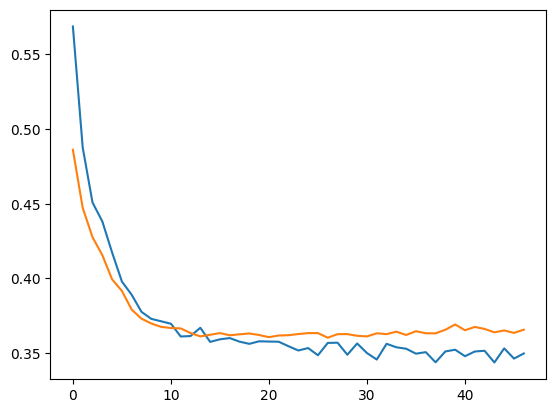

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])

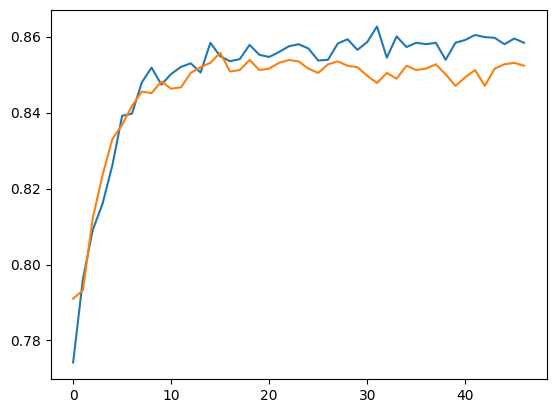

In [22]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])

In [23]:
y_pred=model.predict(x_test_scaled)
y_pred=(y_pred>=0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[1536,   71],
       [ 220,  173]])

In [25]:
# accuracy 
accu=accuracy_score(y_test,y_pred)
accu

0.8545

In [26]:
model.get_weights()

[array([[-9.16954875e-03,  9.16438326e-02,  5.48227370e-01,
          2.12934136e-01, -6.86764345e-02,  1.50574774e-01,
         -3.03201646e-01,  6.19769879e-02, -4.70786579e-02,
          1.05953805e-01,  3.47109884e-01],
        [ 8.16959962e-02,  4.22133446e-01, -1.78993210e-01,
         -7.33218193e-01, -3.31251882e-02, -8.57918918e-01,
         -5.68742812e-01, -2.68254429e-01, -7.66776919e-01,
         -9.18253958e-01, -5.52152753e-01],
        [-6.28344119e-02, -3.89689356e-02, -1.78624511e-01,
          7.32184201e-02,  2.89153010e-02, -7.94704631e-03,
          6.48309290e-02, -1.17301792e-01, -1.05583102e-01,
         -1.59128070e-01, -2.53864229e-01],
        [ 3.76430064e-01, -1.22032791e-01, -4.08986062e-01,
         -3.22543442e-01, -4.96887863e-01, -4.37442392e-01,
         -2.33459964e-01, -5.47482371e-01,  1.34674902e-03,
          6.30335766e-04, -2.69777715e-01],
        [ 1.23116422e+00,  2.27595374e-01, -1.92095414e-01,
          1.40290111e-01, -1.34401643e+00,  